In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Gimage_preprocessing(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(image)
    kernel = np.ones((10, 10), np.uint8)
    eroded_image = cv2.erode(clahe_image, kernel, iterations=1)
    return eroded_image

In [3]:
def ROI_grey(image):
  if image.dtype != np.uint8:  # Check if the image is not of type uint8
        print("Converting the image to uint8.")
        image = image.astype(np.uint8)
  height, width= image.shape[:2]
  crop_height=height // 2
  cropped_image = image[crop_height:,  300:1000]
  mask = cv2.inRange(cropped_image, 200, 225)
  masked_image = cv2.bitwise_and(cropped_image, cropped_image, mask=mask)
  return masked_image

In [4]:
def canny(image):
    #gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(image,(5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

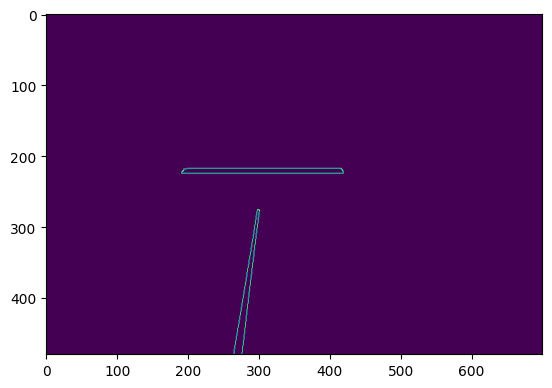

In [17]:
image_path = './img_edge_cases/81_0_0.png'
plt.imshow(canny(ROI_grey(Gimage_preprocessing(image_path))))
plt.show()